### Wiederholung Set Covering:

Aus der Vorlesung:

Im **Set-Covering-Problem** (deutsch: **Mengenüberdeckungsproblem**) geht es darum,
- alle Elemente einer Gesamtmenge zu überdecken mit "Konstrukten", die jeweils eine Teilmenge abdecken
- wenn es um Set Covering als Optimierungsproblem geht, sucht man eine optimale (z.B. kostenminimale) Abdeckung

**Beispiel aus dem letzten Semester:**
- du produzierst eine Radiosendung und möchtest diese in allen US-Bundesstaaten ausstrahlen
- die Ausstrahlung erfolgt über Radiosender
  - jeder Sender wird in bestimmten Sendegebieten (u.U. mehrere Staaten) ausgestrahlt
  - die Sendegebiete können sich dabei überlappen
- $\rightarrow$ Du möchtest die **kleinste Menge an Sendern** ermitteln, die **alle 50 Staaten abdecken**!

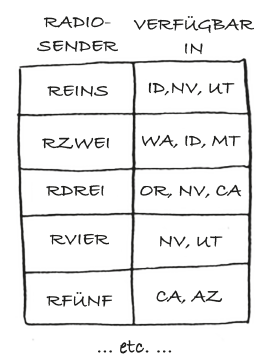
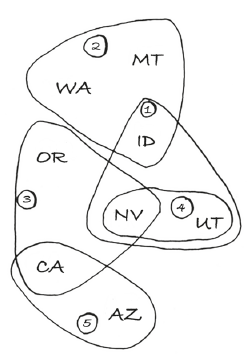

### Einfache, allgemeine Formulierung (nicht aus der Vorlesung):

<p>Etwas allgemeiner formuliert: Wir haben ein Set mit allen Elementen \(U\) ( \(U\), weil dieses Set oft als Universe bezeichnet wird).
Daneben gibt es das Set \(S\), das aus mehreren Subsets besteht, die Elemente aus \(U\) enthalten. Jedes dieser Subsets in \(S\) ist mit Kosten verbunden.
Das kombinatorische Optimierungsproblem besteht nun darin, dass man die Anzahl der Subsets findet, die möglichst viele Elemente von \(U\) "mitbringen", ohne dass diese Auswahl zu teuer wird (sonst könnte man ja direkt alle nehmen).</p>

## Beispiel:

Wie könnten einfache Beispielinstanzen aussehen?

1. Universe mit Werten 0-10 sowie fünf Subsets, die zusammen die Range abbilden könnten (hier noch ohne Kosten):

In [7]:
universe = set(range(1, 11))
subsets = [set([1, 2, 3, 8, 9, 10]),
        set([1, 2, 3, 4, 5]),
        set([4, 5, 7]),
        set([5, 6, 7]),
        set([6, 7, 8, 9, 10])]

2. Universe mit Werten 1-5, 10 Subsets und die dazugehörigen Kosten \(P\)

In [6]:
universe = set(range(1, 6))
S = [[1,3],[2],[1,2,5],[3,5],[4],[5],[1,3],[2,4,5],[1,2],[2,3]]
P = [11,4,9,12,5,4,13,12,8,9]

3. Andere Schreibweise/Formulierung: Die Zeilen einer Null-Eins-Matrix mit m Zeilen und n Spalten ist durch eine Teilmenge der Spalten zu minimalen Kosten abzudecken. Wenn Spalte j eine Zeile i abdeckt, wird dies durch eine 1 beschrieben. Ziel ist es, eine Teilmenge der Spalten zu finden, bei der jede Zeile von mindestens einer Spalte mit einem Minimum der Kosten abgedeckt wird:

In [14]:
costs_vector = np.array([13,19,11,17,7])

covering_matrix = np.array([
    [0,  1, 0, 1, 1],
    [1,  1, 0, 0, 0],
    [0,  0, 1, 0, 1],
    [0,  1, 1, 0, 0],
    [0,  0, 0, 1, 1],
    [1,  0, 0, 0, 0],
    [0,  1, 0, 1, 0],
    [0,  0, 1, 1, 0],
])

Beispiel aus Beasley's OR Library bzw. von https://github.com/guangtunbenzhu/SetCoverPy:

In [8]:
import numpy as np

In [9]:
a_matrix = np.load('./scpa4_matrix.npy')
cost = np.load('./scpa4_cost.npy')

Die 'a_matrix' mit m Zeilen und n Spalten gibt an ob eine Spalte die Zeile abdeckt (True) oder nicht (False):

In [13]:
a_matrix

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Cost bezeichnet dann wieder die Kosten der einzelnen Spalten bzw. Subsets:

In [11]:
cost

array([  1,   1,   1, ..., 100, 100, 100], dtype=int64)

### Ansatzpunkte, um schnell einen 'Kickstart' für die Aufgabenstellung zu schaffen:

* Einfache Distanzen (z.B. siehe oben) ansehen und in Python einlesen
* Erste Überlegungen: Wie würde man intuitiv vorgehen, wenn man entscheiden muss, welches Subset man in die Lösung aufnimmt?
* Wie könnte ein Greedy-Algorithmus in diesem Fall funktionieren?